# Results of the pipeline

77


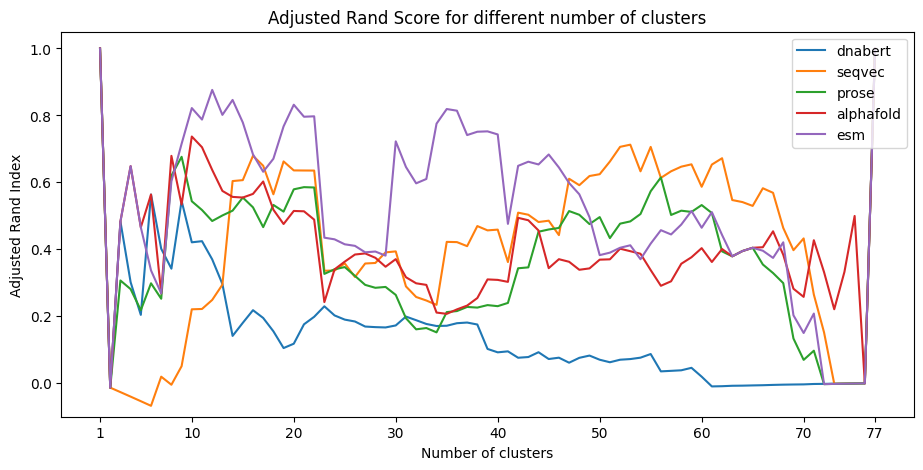

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.171829  0.447620  0.529780   0.422793  0.508553
         50               0.208598  0.482496  0.529780   0.479854  0.501732
         all              0.205911  0.477319  0.529780   0.479854  0.499925
average  10               0.170790  0.444486  0.468835   0.404281  0.480208
         50               0.203156  0.494086  0.470873   0.474302  0.499925
         all              0.256137  0.490050  0.468835   0.474302  0.502521
sum      10               0.269872  0.741375  0.543169   0.627122  0.731201
         50               0.246971  0.648347  0.575778   0.574934  0.806621
         all              0.272138  0.615129  0.575778   0.574934  0.806621
max      10               0.201593  0.662393  0.530884   0.604384  0.645051
         50               0.370779  0.649450  0.534549   0.585771  0.663498
         all              0.382715  0.645573  0.536954   0.585771  0.663498

In [3]:
import sys
sys.path.append('..')
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_covid19.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
with open("./latex_output.txt", "w") as f:
    r.to_latex(f)

fig, _ = plt.subplots(figsize=(11, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 10)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['max']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['max']['10']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['sum']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['sum']['all']['esm'], label='esm')
plt.legend(loc = "upper right")
plt.show()
# fig.savefig(Path(PATH).stem + '.eps')
r
